# Lab 4
## Rebecca Vanni - ecn2wh

1. What makes a model “linear”? “Linear” in what?

  A model is made linear through its relationship between the independent and dependent variable. When this relationship can be represented through a straight line or a y=mx+b equation. A model is linear in its coefficients/parameters are linear. The model is linear in the linear combination of the parameters show a relationship between the variables. 

1. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
   
    The coefficient for a dummy variable is the difference between the dependent variable per that category and the baseline category. If the intercept exists, the coefficient tells you how much greater than or less than that category is from the baseline. If the intercept = 0, then the coefficient is the mean of that category. You need to omit one category, because it it being used as a baseline for comparison, if you don't then the model will put an incorrect correlation between the reference category and baseline. Also known as the dummy trap which makes regression undefinable. 

2. Can linear regression be used for classification? Explain why, or why not.
    Linear regression should not used for classification, but as it predicts continuous values it is not as good at predicting discrete values. Can predict values far outside the range of (0-1). Also it is sensitive to outliers, which classification is not. Linear regression assumes a relationship between x and y, classification this relationship is not always present. Since classification is binary it doesn't work as well with linear regression. Overall not ideal.

3. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
   
   The problem of having high accuracy on training but low on testing is over fitting. Most likely your model has been trained to much on the train data. It makes it accurately predict the specific numbers and is unable to fit new data. It cant understand the relationship correctly and diversely. 

4. Review this page: Non-Linear with Linear. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?

  Two ways to incorporate non linear relationships between your target and features variables are polynomial regression (adding squared or cubic terms of predictors) and applying log(x) and log(y) to linearize the relationships. This is called log transformations. Which help linear regression models to adapt curved solutions without using new approach. 

5. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

Intercept is what the target variable or y should be when all the features (x) are zero or do not equate. The slope coefficient for the variable is how much the target variable will change based on a one unit increase of the feature variable. Dummy variable coefficient is the change in target variable when a specific category is in affect compared to the baseline category. Dummy variable is used when comparing categorical variables, and one of the categories is used as a baseline, which has an intercept. 

# Question One

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# importing data set
url = "https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv"
df = pd.read_csv(url)
df.head()

#fixing column names to remove errors: 
df.columns = df.columns.str.strip()
df.rename(columns={'Neighbourhood': 'Neighborhood', 'Review Scores Rating': 'score', 'Price': 'price'}, inplace=True)

The most expensive borough is:
Neighborhood     Manhattan
price           183.664286
score            91.801496
Name: 2, dtype: object


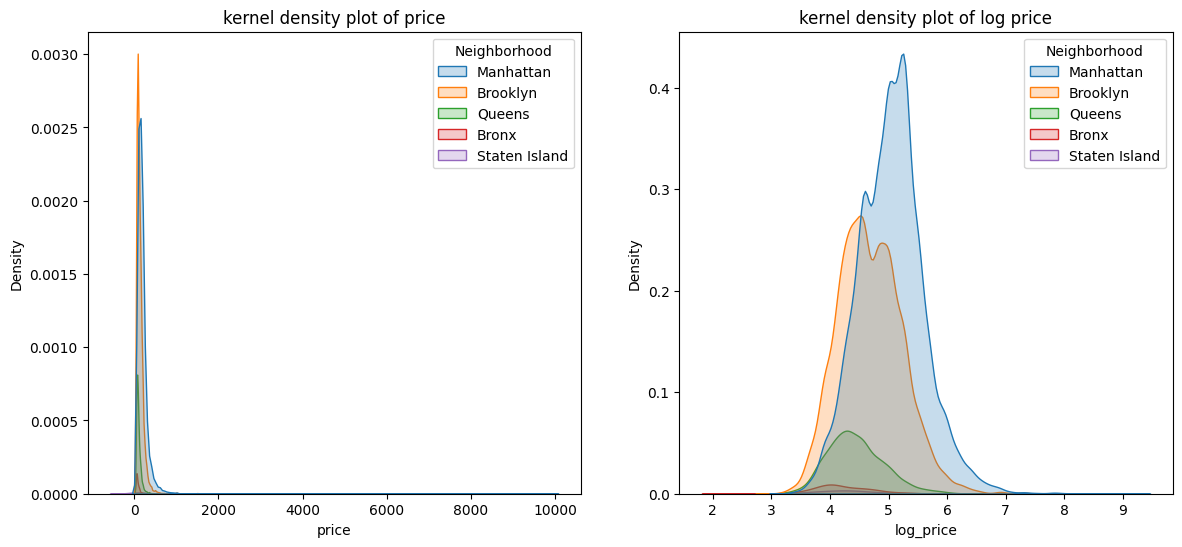

In [4]:
#Q1.1
#Finding average prices and scores
avg = df.groupby('Neighborhood')[['price', 'score']].mean().reset_index()
most_expensive = avg.loc[avg['price'].idxmax()]

print("The most expensive borough is:")
print(most_expensive)

#creating graph based on the density 
plt.figure(figsize=(14, 6))
# Kernel density plot of price
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='price', hue='Neighborhood', fill=True)
plt.title('kernel density plot of price')

# Kernel density plot of log price
plt.subplot(1, 2, 2)
df['log_price'] = np.log(df['price'])
sns.kdeplot(data=df, x='log_price', hue='Neighborhood', fill=True)
plt.title('kernel density plot of log price')

plt.show()

In [5]:
#Q1.2
object_list = list(df.select_dtypes('object'))
df_1 = pd.get_dummies(df, columns = object_list) 
df_1


#assigning the explanatory varaible
X = df_1.filter(like='Neighborhood_')
# Define y (target variable)
y = df['price']
#creating model without intercept 
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)
# Get the coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

# What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
# After comparing these values to the table from part one, it is obvious that these coefficients represent the average price for their neighborhood. 
# This can be seen as they are direct matches. They match the mean prices without the intercept. Therefore coefficients represent the mean value 
# of the continuous var for each category. Minus the intercept the model creates category-specific averages rather than differences 
# from a reference category.

Neighborhood_Bronx             75.276498
Neighborhood_Brooklyn         127.747378
Neighborhood_Manhattan        183.664286
Neighborhood_Queens            96.857233
Neighborhood_Staten Island    146.166667
dtype: float64


In [6]:
#Q1.3
#Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? 
# What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

#we handle the creation of dummies differently as we not drop the first true, this avoids the variables being to highly correlated from the start. 
#The missing category will be used as the baseline for the model to regress, where the intercept is the average price of the dropped category.
#From their the coefficients are the differences in the average price from the dropped category or baseline neighborhood. You can get these coefficients
#by subtracting them from the coefficients in part one.

#dropping first
df_2 = pd.get_dummies(df, columns=object_list, drop_first=True)

X_2 = df_2.filter(like='Neighborhood_')
y = df['price']

model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(X_2, y)

# Get the intercept and coefficients
intercept = model_with_intercept.intercept_
coefficients = pd.Series(model_with_intercept.coef_, index=X_2.columns)

coefficients_df = coefficients.to_frame("Coefficient")
coefficients_df.loc["Intercept"] = intercept

print(coefficients_df)

                            Coefficient
Neighborhood_Brooklyn         52.470881
Neighborhood_Manhattan       108.387789
Neighborhood_Queens           21.580735
Neighborhood_Staten Island    70.890169
Intercept                     75.276498


In [7]:
#Q1.4
#Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R2
#and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_2, y, random_state=99)

#running the regression
model = LinearRegression()
model.fit(x_train, y_train)
#predicting the y values off of the test values
y_pred = model.predict(x_test)

#R2 value and the RMSE 
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

#Coeffiecient 
review_score_coef = model.coef_[0]
most_expensive_property_type = X_2.columns[model.coef_.argmax()]

print(review_score_coef)
print(most_expensive_property_type)

#R2 is .063, and the RMSE is 121.211. The Coefficient on the Review Scores rating is. 59.195. The most expensive property you can rent is Manhattan property.


R^2: 0.063
RMSE: 121.211
59.195277887766004
Neighborhood_Manhattan


In [8]:
#Q1.5
#Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R2
#and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

# Define X (Review Scores + One-hot Neighborhoods + One-hot Property Types)
#df_1 = pd.get_dummies(df, columns=object_list, drop_first=True)
X_3 = df_1[['score'] + list(df_1.filter(like='Neighborhood_').columns) + 
             list(df_1.filter(like='property_type_').columns)]
y = df['price']

x2_train, x2_test, y2_train, y2_test = train_test_split(X_3, y, test_size=0.2, random_state=99)

model = LinearRegression()
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)

#R2 value and the RMSE 
r2 = r2_score(y2_test, y2_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y2_test, y2_pred)
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

#Coeffiecient 
review_score_coef = model.coef_[0]
most_expensive_property_type = X_3.columns[model.coef_.argmax()]

print(review_score_coef)
print(most_expensive_property_type)



R^2: 0.072
RMSE: 121.49
1.0075976052690014
Neighborhood_Manhattan


## Q1.6
### What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.
The Coefficient decreases from 59 to 1 on the Review Scores Rating. The inclusion of property type, helps establish if review score rating had an effect on the price of the properties. The decline in the coefficient suggests that the price difference is related to property type and not as much cores. With the property type held constant the model can correlate the prices with them.  Rather then incorrectly associating it with the score received or over estimating its effect. 

# Question 2

In [9]:
#Q2.1
#Cleaning and importing the cars_hw.csv
cars = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')
print(cars.columns)


Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


In [10]:
#Clean the price category
cars["Price"] = pd.to_numeric(cars["Price"], errors="coerce")
missing_prices = cars[cars["Price"].isna()]
price_outlier_thresholds = cars["Price"].quantile([0.01, 0.99])
cars = cars.dropna(subset=["Price"])
# Ensure all values are finite
cars = cars[np.isfinite(cars["Price"])]

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64
               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   79600

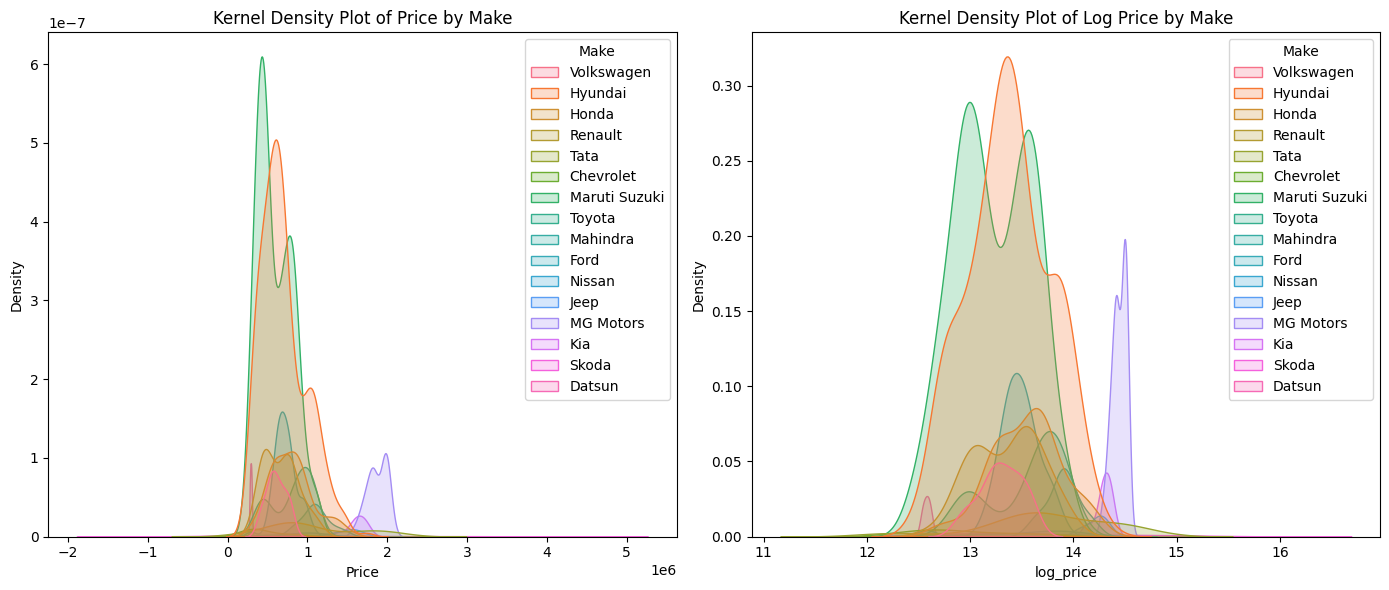

Make
MG Motors    1.869457e+06
Kia          1.614750e+06
Jeep         1.499500e+06
Skoda        1.136000e+06
Mahindra     1.100167e+06
Name: mean, dtype: float64


In [11]:
#Q2.2
#Summarize the Price variable and create a kernel density plot. 
# Use .groupby() and .describe() to summarize prices by brand (Make). 
# Make a grouped kernel density plot by Make. 
# Which car brands are the most expensive? What do prices look like in general?

price_summary = cars['Price'].describe()
print(price_summary)

# Summarize prices by brand (Make)
price_by_make = cars.groupby('Make')['Price'].describe()
print(price_by_make)

# Create a kernel density plot of price
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=cars, x='Price', hue='Make', fill=True)
plt.title('Kernel Density Plot of Price by Make')

# Kernel density plot of log price
plt.subplot(1, 2, 2)
cars['log_price'] = np.log(cars['Price'])
sns.kdeplot(data=cars, x='log_price', hue='Make', fill=True)
plt.title('Kernel Density Plot of Log Price by Make')

plt.tight_layout()
plt.show()

# Determine the most expensive car brands on average
most_expensive_brands = price_by_make['mean'].sort_values(ascending=False).head()
print(most_expensive_brands)


In [12]:
#Q2.3
#Split the data into an 80% training set and a 20% testing set.
train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
train_size = train_set.shape[0]
test_size = test_set.shape[0]



In [13]:
#Q2.4

# Select numeric variables only (excluding Price as it is the target variable)
numeric_features = ["Make_Year", "Mileage_Run", "Seating_Capacity"]
X_train_numeric = train_set[numeric_features]
X_test_numeric = test_set[numeric_features]
y_train = train_set["Price"]
y_test = test_set["Price"]

# Train a linear regression model on numeric variables only
model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)

# Predictions
y_train_pred_numeric = model_numeric.predict(X_train_numeric)
y_test_pred_numeric = model_numeric.predict(X_test_numeric)

# Compute R^2 and RMSE for numeric model
r2_train_numeric = r2_score(y_train, y_train_pred_numeric)
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))

# Display results for the numeric model
numeric_model_results = {
    "R^2 Train": r2_train_numeric,
    "R^2 Test": r2_test_numeric,
    "RMSE Train": rmse_train_numeric,
    "RMSE Test": rmse_test_numeric
}

# Prepare categorical variables using one-hot encoding (drop_first=True to avoid dummy variable trap)
categorical_features = ["Make", "Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type", "No_of_Owners"]
X_train_categorical = pd.get_dummies(train_set[categorical_features], drop_first=True)
X_test_categorical = pd.get_dummies(test_set[categorical_features], drop_first=True)

# Ensure both train and test have the same columns (some categories may be missing in test)
X_train_categorical, X_test_categorical = X_train_categorical.align(X_test_categorical, join="left", axis=1, fill_value=0)

# Train a linear regression model on categorical variables only
model_categorical = LinearRegression()
model_categorical.fit(X_train_categorical, y_train)

# Predictions
y_train_pred_categorical = model_categorical.predict(X_train_categorical)
y_test_pred_categorical = model_categorical.predict(X_test_categorical)

# Compute R^2 and RMSE for categorical model
r2_train_categorical = r2_score(y_train, y_train_pred_categorical)
r2_test_categorical = r2_score(y_test, y_test_pred_categorical)
rmse_train_categorical = np.sqrt(mean_squared_error(y_train, y_train_pred_categorical))
rmse_test_categorical = np.sqrt(mean_squared_error(y_test, y_test_pred_categorical))

# Display results for the categorical model
categorical_model_results = {
    "R^2 Train": r2_train_categorical,
    "R^2 Test": r2_test_categorical,
    "RMSE Train": rmse_train_categorical,
    "RMSE Test": rmse_test_categorical
}

# Combine numeric and categorical variables into a single model
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# Train a linear regression model on combined features
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Predictions
y_train_pred_combined = model_combined.predict(X_train_combined)
y_test_pred_combined = model_combined.predict(X_test_combined)

# Compute R^2 and RMSE for combined model
r2_train_combined = r2_score(y_train, y_train_pred_combined)
r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_train_combined = np.sqrt(mean_squared_error(y_train, y_train_pred_combined))
rmse_test_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))

combined_model_results = {
    "R^2 Train": r2_train_combined,
    "R^2 Test": r2_test_combined,
    "RMSE Train": rmse_train_combined,
    "RMSE Test": rmse_test_combined
}

print(numeric_model_results)
print(categorical_model_results)
print(combined_model_results)


#Categorical model preformed much better then the numeric model. Both of the models preformed worse then the combined model. 
#The combined model had a higher R2 score and the smallest RMSE score, meaning it is more efficient.
#This means that both numeric and categorical values should be used to predict the target variable (price).  

{'R^2 Train': 0.31444462126021566, 'R^2 Test': 0.29407012364751284, 'RMSE Train': np.float64(309338.3729572164), 'RMSE Test': np.float64(284546.951907215)}
{'R^2 Train': 0.7736089611117258, 'R^2 Test': 0.7086843554399447, 'RMSE Train': np.float64(177763.31551974494), 'RMSE Test': np.float64(182791.10601308505)}
{'R^2 Train': 0.8553060847751638, 'R^2 Test': 0.8202733305989008, 'RMSE Train': np.float64(142114.26056968534), 'RMSE Test': np.float64(143575.19660589818)}


In [14]:
# Q2.5
from sklearn.preprocessing import PolynomialFeatures
degrees = range(1, 20)  # Testing polynomial degrees from 1 to 5
# creating list to store the poly info in
results = []

#list that will iterate through the model for each degree (1-6)
for degree in degrees:
    # using sklearn poly features to establish which degree will be generated for features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    #applying the poly feature transform to the numeric variables
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)
    
    # creating the model using the polynomial data, as the intercepts
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    
    # Predictions based on the data
    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)
    
    # this is going to find the r2 values and the rmse values based on the training and test
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

    # Store results
    results.append({
        "Degree": degree,
        "R^2 Train": r2_train_poly,
        "R^2 Test": r2_test_poly,
        "RMSE Train": rmse_train_poly,
        "RMSE Test": rmse_test_poly
    })

# making result list into df so can find max and where goes negative
results_df = pd.DataFrame(results)
# where r2 goes negative
negative_r2_degree = results_df[results_df["R^2 Test"] < 0]["Degree"].min()

# find best model
best_model = results_df["R^2 Test"].idxmax()
best_model = results_df.loc[best_model]

negative_r2_degree, best_model

#Best preforming model is during degree 2, R2 train = .348 and R2 test =.333. 
#The model became negative at degree 17. 
#This model is a little bit better then the numeric model, as seen in the R2 values of the test data.
#However, still preforms worse then the joint model, so that would be the best model for this data.

(np.int64(17),
 Degree             2.000000
 R^2 Train          0.348221
 R^2 Test           0.326911
 RMSE Train    301621.827203
 RMSE Test     277849.359342
 Name: 1, dtype: float64)

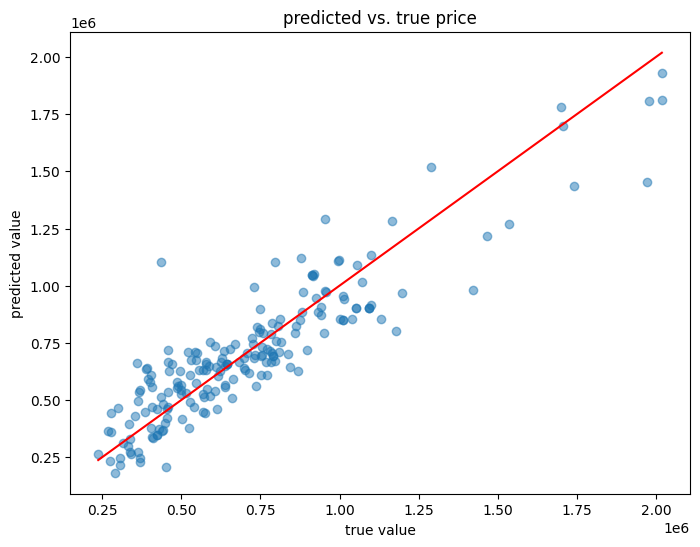

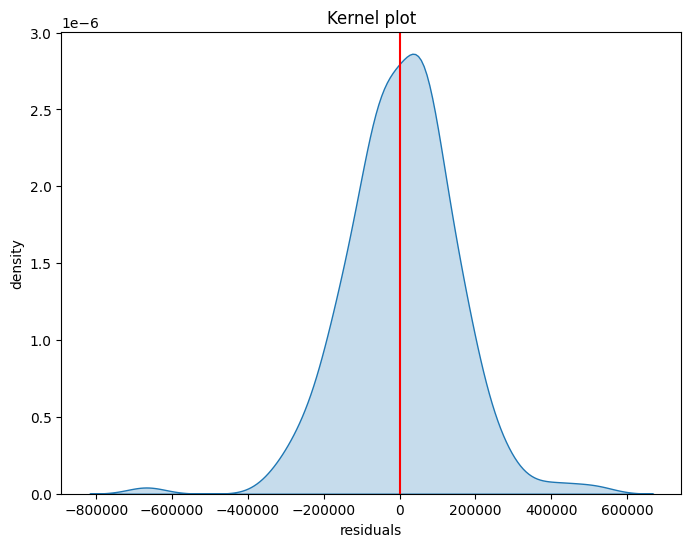

In [15]:
#Q2.6

#Combined model depicted in a scatter plot. 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_combined, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.title("predicted vs. true price")
plt.show()

#Finding the residual errors
residual = y_test - y_test_pred_combined

# Kernel plot of the residuals 
plt.figure(figsize=(8, 6))
sns.kdeplot(residual, fill=True)
plt.xlabel("residuals")
plt.ylabel("density")
plt.title("Kernel plot")
plt.axvline(0, color='red')
plt.show()

#Do the residuals look roughly bell-shaped around zero? 
#Evaluate the strengths and weaknesses of your model.

#The residuals do look mostly bell-shaped around the zero, with a slight skew to the left. 
#This suggest that is it over estimating some of the higher prices of the cars. My model is relatively 
#good at predicting the prices, despite having to deal with outliers on the more expensive side, 
#which could be causing some over-estimating in the model. However looks like a good fit as the R2 is .82.
#the model can explain a majority of the variance

# Question 3

1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors.
5. Compute the RMSE on the test set.
6. Which model performed the best, and why?
7. What did you learn?

In [16]:
#Q3.1
fish = pd.read_csv('/workspaces/DS-3021/data/Fish[1].csv')
fish.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


The most heaviest fish is:
Species          Pike
Weight     718.705882
Width        5.086382
Name: 3, dtype: object


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


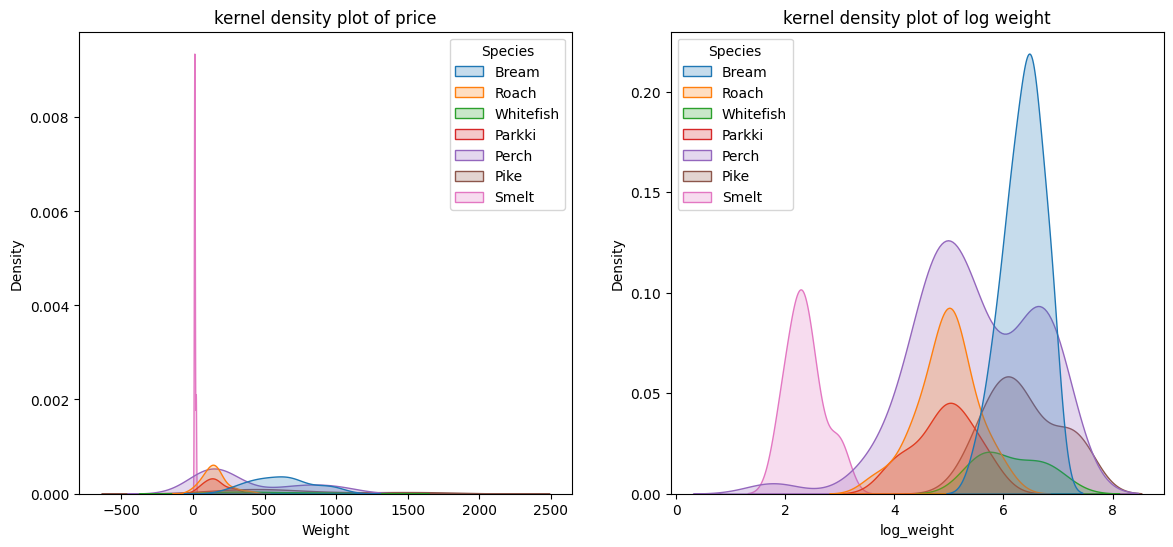

In [25]:
#Q3.2
#It was zero
na_counts = fish.isna().sum()
#print(na_counts)

categorical_cols = fish.select_dtypes(include=['object']).columns.tolist()
#There are three different ways to measure the length of a fish:
# Total length, fork length, and standard length 

#target variable is the weight of the fish
#potential features/predictors: species, width, and height 

avg = fish.groupby('Species')[['Weight', 'Width']].mean().reset_index()
heaviest = avg.loc[avg['Weight'].idxmax()]

print("The most heaviest fish is:")
print(heaviest)

#creating graph based on the density 
plt.figure(figsize=(14, 6))
# Kernel density plot of weight
plt.subplot(1, 2, 1)
sns.kdeplot(data=fish, x='Weight', hue='Species', fill=True)
plt.title('kernel density plot of price')

# Kernel density plot of log price
plt.subplot(1, 2, 2)
fish['log_weight'] = np.log(fish['Weight'])
sns.kdeplot(data=fish, x='log_weight', hue='Species', fill=True)
plt.title('kernel density plot of log weight')

plt.show()



In [40]:
#Q3.2 Continued
#Creating dummies for category of Species 
category_list = list(fish.select_dtypes('object'))
fish2 = pd.get_dummies(fish, columns=category_list, drop_first=True)

x = fish2.filter(like='Species')
y = fish['Weight']

#for other models 
x2 = np.array(fish["Height"]).reshape(-1, 1)
x3 = np.array(fish["Length1"]).reshape(-1, 1)

model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(x, y)

# Get the intercept and coefficients
intercept = model_with_intercept.intercept_
coefficients = pd.Series(model_with_intercept.coef_, index=x.columns)

coefficients_df = coefficients.to_frame("Coefficient")
coefficients_df.loc["Intercept"] = intercept

print(coefficients_df)

#coefficients of the species below for the weight

                   Coefficient
Species_Parkki     -463.010390
Species_Perch      -235.589286
Species_Pike        100.877311
Species_Roach      -465.778571
Species_Smelt      -606.650000
Species_Whitefish   -86.828571
Intercept           617.828571


In [47]:
# Q3.3
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, random_state=99)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, random_state=99)

In [48]:
#Q3.4
#running the regression for the different species 
model = LinearRegression()
model.fit(x_train, y_train)

# Predict y values using test values
y_pred = model.predict(x_test)
# Compute R^2 and RMSE
r2 = r2_score(y_test, y_pred)
print("Species Model R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Species Model RMSE:", round(rmse, 3))

# Model on heights
height_model = LinearRegression(fit_intercept=True)
height_model.fit(x2_train, y_train)
y2_pred = height_model.predict(x2_test)

r22 = r2_score(y_test, y2_pred)
print("Height Model R^2:", round(r22, 3))
mse2 = mean_squared_error(y_test, y2_pred)
rmse2 = mse2 ** 0.5
print("Height Model RMSE:", round(rmse2, 3))


# Model on different lengths
length_model = LinearRegression(fit_intercept=True)
length_model.fit(x3_train, y_train)
y3_pred = length_model.predict(x3_test)
r23 = r2_score(y_test, y3_pred)
print("Length1 Model R^2:", round(r23, 3))
mse3 = mean_squared_error(y_test, y3_pred)
rmse3 = mse3 ** 0.5
print("Length1 Model RMSE:", round(rmse3, 3))


Species Model R^2: 0.325
Species Model RMSE: 319.371
Height Model R^2: 0.428
Height Model RMSE: 293.952
Length1 Model R^2: 0.839
Length1 Model RMSE: 156.125


### Question 3.5
#### Which model performed the best, and why?
Length model preformed the best (length1 = feature) because it has the greatest R2 value. This means that 83.95 of the variance in the data can be explained and accounted for by the model. It also had the lowest RMSE, which means it had the smallest amount of prediction error. Overall it is the best fit for predicting the weight. Which makes sense has length and weight are usually related for fish. Longer means older and more weight.

### Question 3.6
#### What did you learn?
I learned throughout this entire lab about how to use python to create model which utilize linear regression to make predictions. I learned that a lower R2 value and a higher RMSE are better for a model to contain. I learned how to look at a data set and identify a good target variable vs the feature variable. Also what dummy variables are and how to avoid the dummy variable trap. By by dropping the first column, and paying to attention to variables which could be highly correlated and messing with results. Additionally learned how to make density graphs and also different sklearn packages which can be used for linear regression. 
